---

### Комментарий наставника

Привет, Александр! Спасибо за вовремя сданную работу :)

Ты оказался передовиком, и сдал всё самый первый. Молодец

Работа получилась интересной. Выводы у тебя получились короткими, но лаконичными. Это здорово.

Комментариев я также оставил немного, потому что особо добавить мне было нечего. Если возникнут вопросы, - обращайся :)

Все комментарии под соответствующими ячейками.

---

Описание данных

#### Данные для первой части

Файл hypothesis.csv

Hypothesis — краткое описание гипотезы;

Reach — охват пользователей по 10-балльной шкале;

Impact — влияние на пользователей по 10-балльной шкале;

Confidence — уверенность в гипотезе по 10-балльной шкале;

Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

#### Данные для второй части

Файл orders.csv

transactionId — идентификатор заказа;

visitorId — идентификатор пользователя, совершившего заказ;

date — дата, когда был совершён заказ;

revenue — выручка заказа;

group — группа A/B-теста, в которую попал заказ.

Файл visitors.csv

date — дата;

group — группа A/B-теста;

visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Описание проекта

Контекст

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

#### Часть 1. Приоритизация гипотез.

В файле hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина 

с указанными параметрами Reach, Impact, Confidence, Effort.

#### Задача

Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

#### Часть 2. Анализ A/B-теста

ы провели A/B-тест и получили результаты, 

которые описаны в файлах orders.csv и visitors.csv.

#### Задача

Проанализируйте A/B-тест:
Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Примите решение по результатам теста и объясните его. Варианты решений:
    1. Остановить тест, зафиксировать победу одной из групп.
    
    2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

In [93]:
# импортирую необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [94]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [95]:
hypothesis.name = 'hypothesis'
orders.name = 'orders'
visitors.name = 'visitors'

In [96]:

def information(data):
    print('--INFO: ', data.name, '--', sep='')
    print()
    print('--------------------------------------------------------')
    print(data.head(10))
    print('--------------------------------------------------------')
    print()
    print(data.info())

In [97]:
information(hypothesis)

--INFO: hypothesis--

--------------------------------------------------------
                                          Hypothesis  Reach  Impact  \
0  Добавить два новых канала привлечения трафика,...      3      10   
1  Запустить собственную службу доставки, что сок...      2       5   
2  Добавить блоки рекомендаций товаров на сайт ин...      8       3   
3  Изменить структура категорий, что увеличит кон...      8       3   
4  Изменить цвет фона главной страницы, чтобы уве...      3       1   
5  Добавить страницу отзывов клиентов о магазине,...      3       2   
6  Показать на главной странице баннеры с актуаль...      5       3   
7  Добавить форму подписки на все основные страни...     10       7   
8  Запустить акцию, дающую скидку на товар в день...      1       9   

   Confidence  Efforts  
0           8        6  
1           4       10  
2           7        3  
3           3        8  
4           1        1  
5           2        3  
6           8        3  
7         

Вывод по таблице hypothesis: пропущенных значений нет, типы данных корректны, необходимо переименование столбцов

In [98]:
information(orders)

--INFO: orders--

--------------------------------------------------------
   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B
5      182168103   935554773  2019-08-15     2210     B
6      398296753  2900797465  2019-08-15     1860     B
7     2626614568    78758296  2019-08-15     1044     A
8     1576988021   295230930  2019-08-15    13710     A
9     1506739906  1882260405  2019-08-15     1855     B
--------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null in

In [99]:
orders['revenue'].describe()

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

In [100]:
print(orders['date'].min(), orders['date'].max())

2019-08-01 2019-08-31


Вывод по таблице orders: даны записи по заказам с 1 по 31 августа 2019 года, необходимо скорректировать тип данных поля date и название полей transactionId и visitorId, пропущенных значений нет, большой разброс значений по полю revenue(предполагаю выбросы).

In [101]:
information(visitors)

--INFO: visitors--

--------------------------------------------------------
         date group  visitors
0  2019-08-01     A       719
1  2019-08-02     A       619
2  2019-08-03     A       507
3  2019-08-04     A       717
4  2019-08-05     A       756
5  2019-08-06     A       667
6  2019-08-07     A       644
7  2019-08-08     A       610
8  2019-08-09     A       617
9  2019-08-10     A       406
--------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.5+ KB
None


In [103]:
print(visitors['date'].min(), visitors['date'].max())

2019-08-01 2019-08-31


In [104]:
visitors['visitors'].describe()

count     62.000000
mean     607.290323
std      114.400560
min      361.000000
25%      534.000000
50%      624.500000
75%      710.500000
max      770.000000
Name: visitors, dtype: float64

Вывод по таблице visitors: даны записи по количеству посетителей с 1 по 31 августа 2019 года, необходимо скорректировать тип данных поля date, пропущенных значений нет.

Проведу необходимые корректировки до начала анализа данных

In [105]:
# функция для приведения названий столбцов к нижнему регистру
def columns_rename(data):
    columns_renamed = []
    for column in data.columns:
        column = column.lower()
        columns_renamed.append(column)
    data.columns = columns_renamed
    return data.columns

---

### Комментарий наставника

Интересное решение, но твою функцию можно заменить, используя следующую конструкцию:

**data.columns.str.lower()**

---

In [106]:
columns_rename(hypothesis)

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

In [107]:
# переименование столбцов в orders
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

#### Часть 1. Приоритизация гипотез.

Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [113]:
def prioritization_hypothesis(data, fm_type):
    
    if fm_type == 'ICE':
        data['ICE'] = (data['impact']*data['confidence'])/data['efforts']
    else:
        data['RICE'] = data['reach']*data['impact']*data['confidence']/data['efforts']
    
    ax = (data[['hypothesis', fm_type]].set_index('hypothesis'))\
                            .sort_values(fm_type, ascending=True)\
                            .plot(kind='barh')
    ax.set(title=f'Приоритизация гипотез в фреймворке {fm_type}', xlabel=f'Приоритет / {fm_type}')
    plt.show()

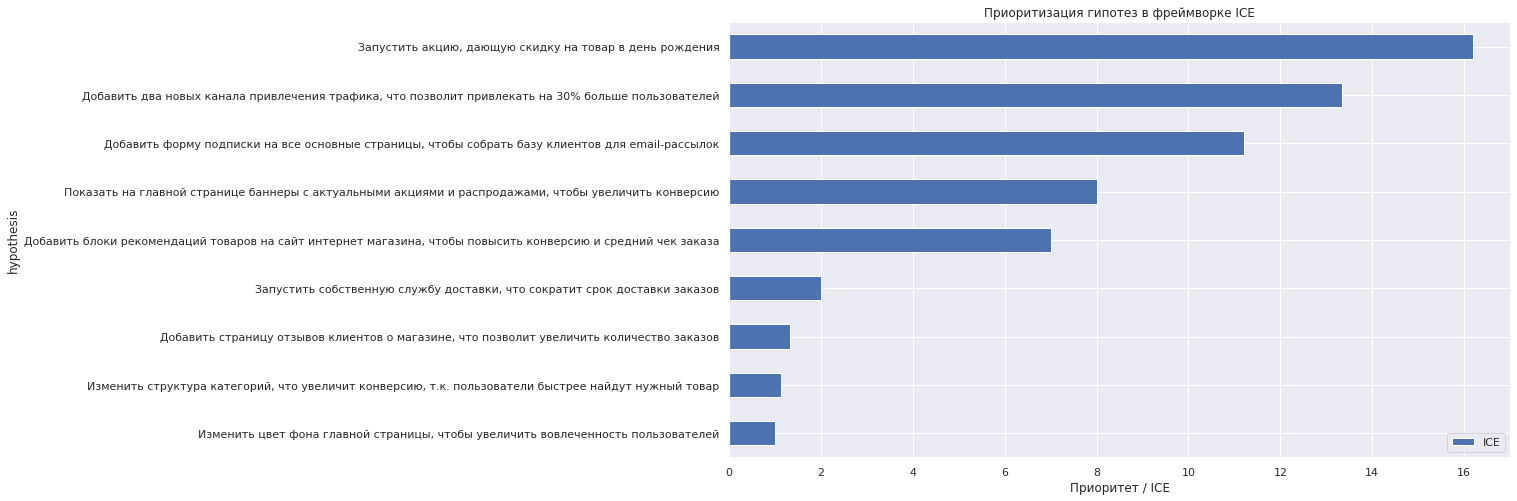

In [114]:
prioritization_hypothesis(hypothesis, 'ICE')


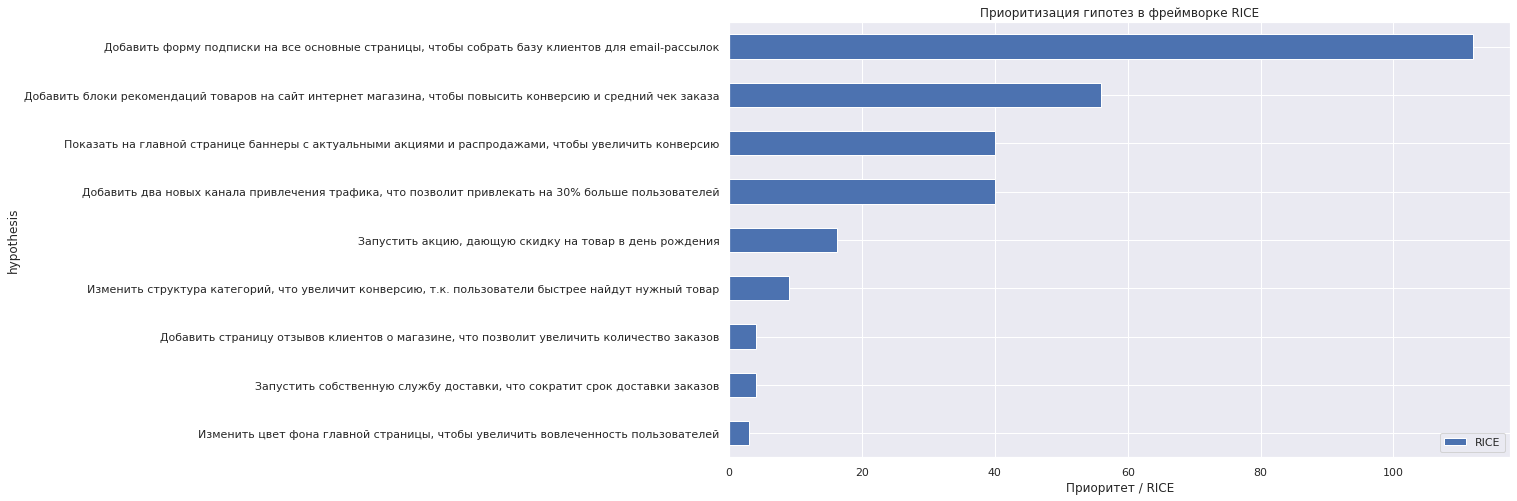

In [115]:
prioritization_hypothesis(hypothesis, 'RICE')

In [116]:

hypothesis.sort_values('reach', ascending=False).head(1)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.2,112.0


#### Вывод:

После изменения фреймворка изменилось ранжирование гипотез на основе рассчитанного рейтинга ICE/RICE, тк в формуле расчета ICE не учитывается компонент reach (охват пользователей).

---

### Комментарий наставника

Да, действительно это так.

---

#### Часть 1. Приоритизация гипотез. Вариант 2 .  Можно немного более подробнее сделать. 

Фреймворк ICE для приоритизации гипотез

In [117]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

In [118]:
hypothesis.sort_values('ICE', ascending=False).set_index('hypothesis')

,reach,impact,confidence,efforts,ICE,RICE
hypothesis,,,,,,
"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0



Топ-3 приоритетных гипотезы по методу ICE:

Запустить акцию, дающую скидку на товар в день рождения

Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

У данных гипотез средний уровень по efforts, при этом довольно высокие показатели по параметрам

impact и confidence. Больше всего влияния на пользователей предположительно окажет добавление двух 

новых каналов для привлечения трафика. При этом больше всего уверенности в успехе гипотезы о запуске акции,
дающей скидку в день рождения.

#### Фреймворк RICE для приоритизации гипотез

In [119]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

In [120]:
hypothesis.sort_values('RICE', ascending=False).set_index('hypothesis')

,reach,impact,confidence,efforts,ICE,RICE
hypothesis,,,,,,
"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


Топ-4 приоритетных гипотезы по методу RICE:

Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

Первые две гипотезы становятся высокоприоритетными преимущественно за счёт параметров reach и confidence.

При этом для добавления блоков рекомендаций товаров на сайт интернет магазина оценочно потребуется относительно немного efforts. Добавление двух новых каналов привлечения трафика - гипотеза которая осталась в топ, однако стоит отметить довольно невысокий охват пользователей, которых данное изменение затронет. Аналогичное значение RICE получено для гипотезы о показах на главной странице баннеров с актуальными акциями и распродажами. По данной гипотезе довольно высокое значение охвата и уверенности в её успехе.

#### Сравнение результатов RICE и ICE

Есть две гипотезы, которые попадают в топ и по ICE, и по RICE:

Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

Первая гипотеза предполагает изменение, которое охватит наибольшое число пользователей. Кроме того, степень уверенности в успешной реализации данных нововведений высокая.Вторая из этих гипотез имеет довольно низкий охват, но влияние на тех пользователей, которых она затронет, должно быть очень высоким. При этом также высока уверенность в успехе предполагаемых изменений.

Топ-1 гипотеза по ICE (запустить акцию, дающую скидку на товар в день рождения) предположительно охватит минимальное число пользователей, что логично: число людей, у которых будет день рождения за небольшой период времени проведения эксперимента не так велико. Поэтому данная гипотеза лишь на пятом месте по RICE.

За счёт высокого показателя охвата в топ по RICE попадает также гипотеза о добавлении блоков рекомендаций товаров на сайт интернет магазина. Однако, хотя данное изменение затронет довольно много пользователей, влияние будет не таким уж большим (impact = 3). Поэтому данная гипотеза лишь на пятом месте по показателю ICE.

Самыми низкими приоритетами и по ICE, и по RICE характеризуются следующие гипотезы (последние 4 позиции в разной последовательности):

Запустить собственную службу доставки, что сократит срок доставки заказов

Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов

Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар

Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей

При этом изменение структуры категорий и запуск собственной службы доставки потребуют несоизмеримо высокие усилия. Остальные две гипотезы характеризуются низкими показателями по всем параметрам.

---

### Комментарий наставника

Молодец! :)

А на что бы ты сам приложил усилия?

---

Часть 2. Анализ A/B-теста

##### График кумулятивной выручки по группам

In [121]:
# рассчитываю выручку по дням для группы A
revenue_a = orders.query('group == "A"').groupby('date').agg({'revenue':'sum'}).reset_index()

# рассчитываю кумулятивную выручку для группы A
cum_revenue_a = revenue_a.apply(lambda x: revenue_a[revenue_a['date'] <= x['date']].\
                                           agg({'date' : 'max', 'revenue' : 'sum'}), axis=1).sort_values(by=['date'])
cum_revenue_a.head()

,date,revenue
0,2019-08-01,148579
1,2019-08-02,242401
2,2019-08-03,354874
3,2019-08-04,425699
4,2019-08-05,549917


In [122]:
# рассчитываю выручку по дням для группы B
revenue_b = orders.query('group == "B"').groupby('date').agg({'revenue':'sum'}).reset_index()

# рассчитываю кумулятивную выручку для группы A
cum_revenue_b = revenue_b.apply(lambda x: revenue_b[revenue_b['date'] <= x['date']].\
                                           agg({'date' : 'max', 'revenue' : 'sum'}), axis=1).sort_values(by=['date'])
cum_revenue_b.head()

,date,revenue
0,2019-08-01,101217
1,2019-08-02,266748
2,2019-08-03,380996
3,2019-08-04,489567
4,2019-08-05,581995


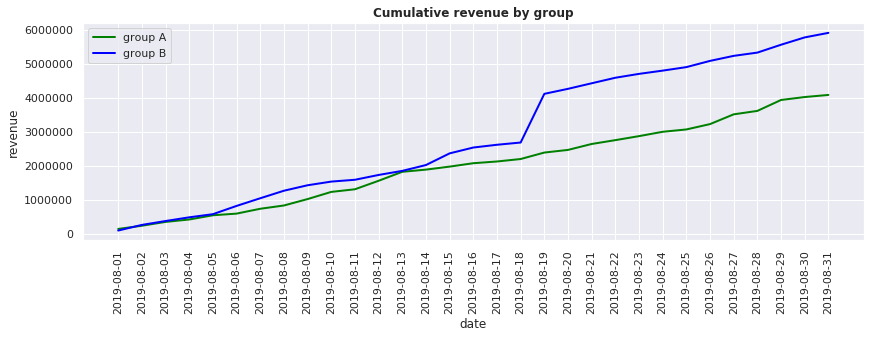

In [123]:
sns.set(style='darkgrid')
plt.figure(figsize=(14,4))
sns.lineplot(x='date', y='revenue', label='group A', color='green', data=cum_revenue_a, lw=2)
sns.lineplot(x='date', y='revenue', label='group B', color='blue', data=cum_revenue_b, lw=2)
plt.xticks(cum_revenue_a['date'], rotation=90)
plt.title('Cumulative revenue by group', fontweight='bold')
plt.show()

Первые пять дней значения кумулятивной выручки по группам практически не различаются. Далее на всём периоде значения кумулятивной выручки группы B превосходят значения по группе A. Наиболее существенный скачок по группе B наблюдается 19 августа.

In [124]:
# объединяю данные по куммулятивным выручкам, рассчитываю относительное изменение за каждый день
cum_rev_all = cum_revenue_a.merge(cum_revenue_b, on='date', suffixes=('_a', '_b'))
cum_rev_all['revenue_change'] = cum_rev_all['revenue_b'] / cum_rev_all['revenue_a'] - 1
cum_rev_all.head()

,date,revenue_a,revenue_b,revenue_change
0,2019-08-01,148579,101217,-0.318766
1,2019-08-02,242401,266748,0.100441
2,2019-08-03,354874,380996,0.073609
3,2019-08-04,425699,489567,0.150031
4,2019-08-05,549917,581995,0.058332


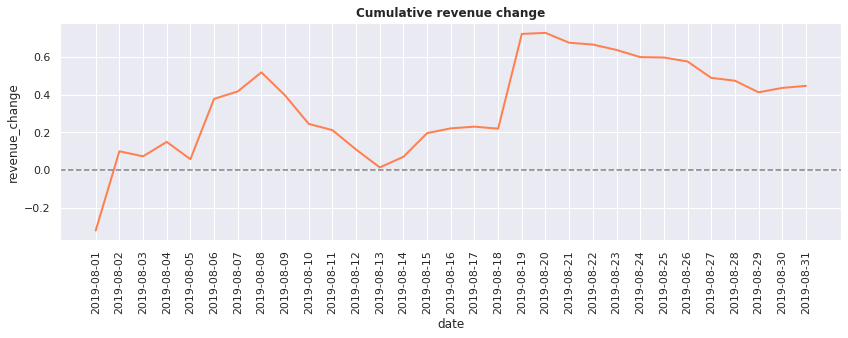

In [125]:
# строю график относительного различия кумулятивной выручки
sns.set(style='darkgrid')
plt.figure(figsize=(14,4))
sns.lineplot(x='date', y='revenue_change', color='coral', data=cum_rev_all, lw=2)
plt.xticks(cum_rev_all['date'], rotation=90)
plt.axhline(y=0, color='gray', linestyle='--')
plt.title('Cumulative revenue change', fontweight='bold')
plt.show()

На данном графике также видно, что кумулятивное значение выручки группы B было ниже только в первый день анализа. Также значения практически сравнялись 13 августа. Наибольшие скачки относительного изменения кумулятивной выручки отмечаются 8 и 19 августа. Вероятнее всего, 19 августа наблюдается аномалия, имеют место выбросы. После указанной даты разрыв начинает сокращаться со временем, однако к концу анализируемого периода снова несколько возрастае

---

### Комментарий наставника

Было бы интересно проверить наличие аномалий. Возможно, тут имеет место влияние других факторов в эти дни

---

#### График кумулятивного среднего чека по группам

In [129]:
# функция для расчёта среднего чека по группам
def avg_payment(group_name):
    # рассчитываю количество заказов по дням для группы
    orders_group = orders.query('group == @group_name').groupby('date').agg({'transaction_id':pd.Series.nunique}).\
    reset_index()
    orders_group.columns = ['date', 'orders']
    
    # рассчитываю кумулятивное число заказов для группы
    cum_orders_group = orders_group.apply(lambda x: orders_group[orders_group['date'] <= x['date']].\
                                  agg({'date' : 'max', 'orders' : 'sum'}), axis=1).sort_values(by=['date'])
    
    # добавляю значения кумулятивной выручки для группы
    if group_name == 'A':
        cum_rev_orders_group = cum_orders_group.merge(cum_revenue_a, on='date')
    elif group_name == 'B':
        cum_rev_orders_group = cum_orders_group.merge(cum_revenue_b, on='date')
        
    # рассчитываю средний чек для группы
    cum_rev_orders_group['avg_payment'] = cum_rev_orders_group['revenue'] / cum_rev_orders_group['orders']
    
    return pd.DataFrame(cum_rev_orders_group)

In [130]:

cum_rev_orders_a = avg_payment('A')
cum_rev_orders_b = avg_payment('B')

cum_rev_orders_all = cum_rev_orders_a.merge(cum_rev_orders_b, on='date', suffixes=('_a', '_b'))
cum_rev_orders_all.head()

,date,orders_a,revenue_a,avg_payment_a,orders_b,revenue_b,avg_payment_b
0,2019-08-01,24,148579,6190.791667,21,101217,4819.857143
1,2019-08-02,44,242401,5509.113636,45,266748,5927.733333
2,2019-08-03,68,354874,5218.735294,61,380996,6245.836066
3,2019-08-04,84,425699,5067.845238,78,489567,6276.500000
4,2019-08-05,109,549917,5045.110092,101,581995,5762.326733


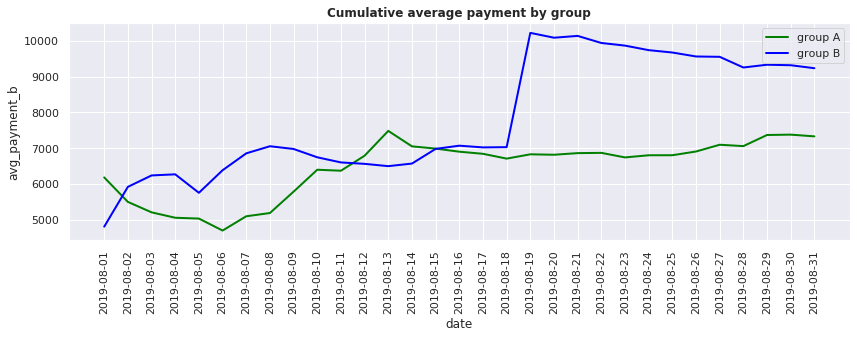

In [131]:
sns.set(style='darkgrid')
plt.figure(figsize=(14,4))
sns.lineplot(x='date', y='avg_payment_a', label='group A', color='green', data=cum_rev_orders_all, lw=2)
sns.lineplot(x='date', y='avg_payment_b', label='group B', color='blue', data=cum_rev_orders_all, lw=2)
plt.xticks(cum_rev_orders_all['date'], rotation=90)
plt.title('Cumulative average payment by group', fontweight='bold')
plt.show()

умулятивное значение среднего чека по группе А превышало значение группы B только в первый день анализируемого периода, а также с 11 по 15 августа. По группе B с 9 по 15 августа наблюдается просадка, однако 19 августа происходит резкий рост значения, что соответствует и результатам, полученным по выручке. Таким образом, предполагаю, что аномалия связана именно с показателем выручки, а не с количеством заказов. То есть, имел место аномально дорогой заказ.

---

### Комментарий наставника

Логичное предположение. Вполне могло быть и так, но в эти периоды также наблюдаются тренды. То есть, нельзя точно сказать, что это было единоразово. График постепенно увеличивался. 

Тут, опять же, может быть ещё что-то, что повлияло на увеличение чека

---

#### График относительного изменения кумулятивного среднего чека группы B к группе A

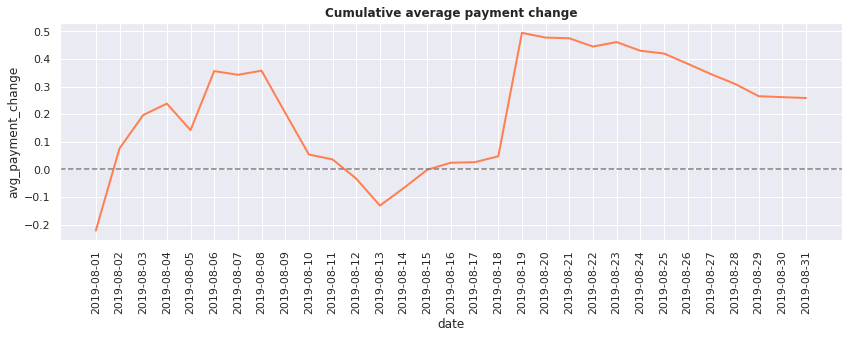

In [132]:
cum_rev_orders_all['avg_payment_change'] = cum_rev_orders_all['avg_payment_b'] / \
cum_rev_orders_all['avg_payment_a'] - 1

# строю график относительного различия кумулятивного среднего чека
sns.set(style='darkgrid')
plt.figure(figsize=(14,4))
sns.lineplot(x='date', y='avg_payment_change', color='coral', data=cum_rev_orders_all, lw=2)
plt.xticks(cum_rev_orders_all['date'], rotation=90)
plt.axhline(y=0, color='gray', linestyle='--')
plt.title('Cumulative average payment change', fontweight='bold')
plt.show()

График относительного различия кумулятивного среднего чека в целом подтверждает выводы, полученные выше: почти на всём рассматриваемом периоде кумулятивное значение среднего чека группы B превышало этот показатель для группы A. Различие в значениях резко возрасло 19 августа, однако после стало сокращаться. Тем не менее, к концу анализируемого периода разрыв по-прежнему остаётся существенным.

#### График кумулятивной конверсии по группам

Для расчёта кумулятивной конверсии необходимы следующие значения: кумулятивное число посетителей, кумулятивное число заказов. Второй показатель уже был рассчитан выше, рассчитываю первый.

In [133]:
# функция для расчёта кумулятивного числа посетителей по группам
def cum_visitors(group_name):
    visitors_group = visitors.query('group == @group_name')
    
    cum_visitors_group = visitors_group.apply(lambda x: visitors_group[visitors_group['date'] <= x['date']].\
                                           agg({'date' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date'])
    
    return pd.DataFrame(cum_visitors_group)

In [134]:
cum_visitors_a = cum_visitors('A')
cum_visitors_b = cum_visitors('B')

cum_visitors_all = cum_visitors_a.merge(cum_visitors_b, on='date', suffixes=('_a', '_b'))
cum_visitors_all.head()

,date,visitors_a,visitors_b
0,2019-08-01,719,713
1,2019-08-02,1338,1294
2,2019-08-03,1845,1803
3,2019-08-04,2562,2573
4,2019-08-05,3318,3280


In [135]:
cum_conversion = cum_visitors_all.merge(cum_rev_orders_all[['date', 'orders_a', 'orders_b']], on='date')

# расчёт конверсии по группам
cum_conversion['conversion_a'] = cum_conversion['orders_a'] / cum_conversion['visitors_a']
cum_conversion['conversion_b'] = cum_conversion['orders_b'] / cum_conversion['visitors_b']
cum_conversion.head()

,date,visitors_a,visitors_b,orders_a,orders_b,conversion_a,conversion_b
0,2019-08-01,719,713,24,21,0.033380,0.029453
1,2019-08-02,1338,1294,44,45,0.032885,0.034776
2,2019-08-03,1845,1803,68,61,0.036856,0.033833
3,2019-08-04,2562,2573,84,78,0.032787,0.030315
4,2019-08-05,3318,3280,109,101,0.032851,0.030793


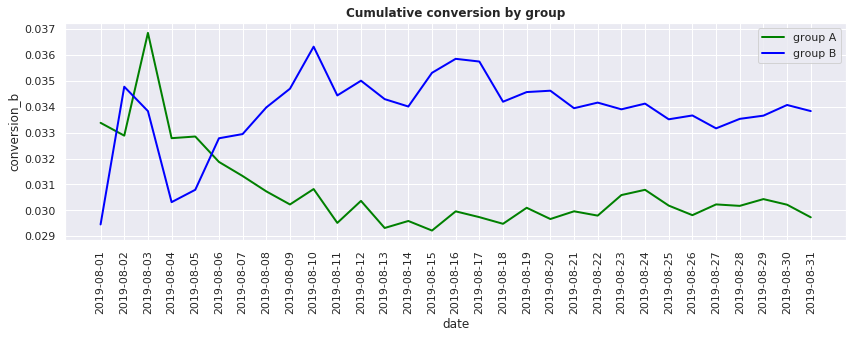

In [136]:
sns.set(style='darkgrid')
plt.figure(figsize=(14,4))
sns.lineplot(x='date', y='conversion_a', label='group A', color='green', data=cum_conversion, lw=2)
sns.lineplot(x='date', y='conversion_b', label='group B', color='blue', data=cum_conversion, lw=2)
plt.xticks(cum_conversion['date'], rotation=90)
plt.title('Cumulative conversion by group', fontweight='bold')
plt.show()

Значение конверсии по группам колеблется от 3 до 4%. В начале периода значение конверсии по группе A было выше, чем по группе B (за исключением 2-го августа). Однако, с 4-5-го августа значение конверсии по группе B начало расти, а по группе A снижаться. С 6-го августа значение конверсии по группе B превышает значение по группе A. Разрыв немного сокращается к концу периода.

#### График относительного изменения кумулятивной конверсии группы B к группе A

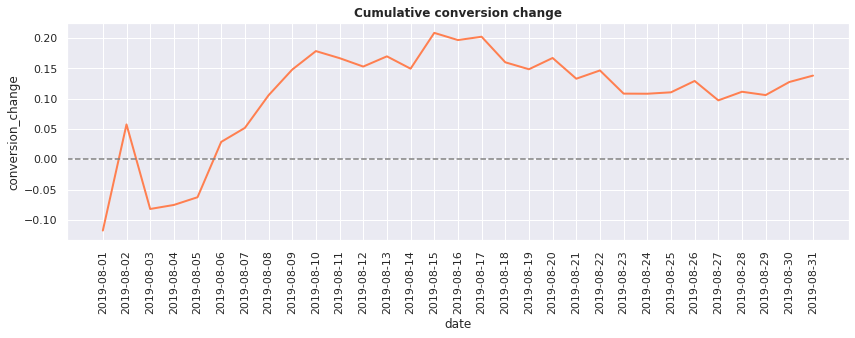

In [137]:
cum_conversion['conversion_change'] = cum_conversion['conversion_b'] / \
cum_conversion['conversion_a'] - 1

# строю график относительного различия кумулятивного среднего чека
sns.set(style='darkgrid')
plt.figure(figsize=(14,4))
sns.lineplot(x='date', y='conversion_change', color='coral', data=cum_conversion, lw=2)
plt.xticks(cum_conversion['date'], rotation=90)
plt.axhline(y=0, color='gray', linestyle='--')
plt.title('Cumulative conversion change', fontweight='bold')
plt.show()



Значение кумулятивной конверсии по группе B стабильно возрастает по отношению к группе A с 3 по 10 августа, дальше наблюдаются колебания. Тем не менее, на протяжении всего периода с 6-го августа кумулятивное значение конверсии по группе B превышает значения по группе A. Со временем разрыв немного сокращается, однако в последние дни периода снова начинает расти.

#### Точечный график количества заказов по пользователям

In [139]:
# рассчитываю количество заказов, совершённых каждым пользователем
orders_by_users = orders.drop(['group', 'revenue', 'date'], axis=1).\
groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})

orders_by_users.columns = ['visitor_id','orders']

orders_by_users.sort_values(by='orders',ascending=False).head(10)

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


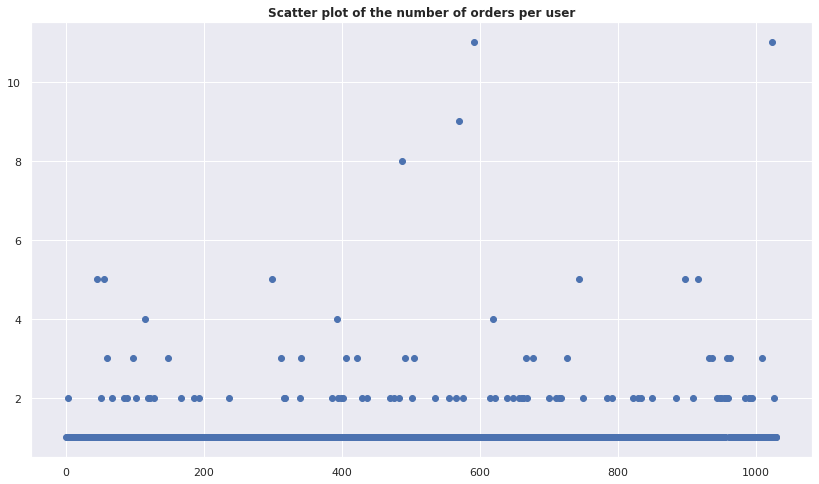

In [154]:
x_values = pd.Series(range(0,len(orders_by_users)))

plt.scatter(x_values, orders_by_users['orders'])
plt.title('Scatter plot of the number of orders per user', fontweight='bold')
plt.show()


На графике видно, что большинство пользователей совершают 1-2 заказа. Однако, есть и те, которые совершают более 6 заказов. Очевидно, что есть выбросы, необходимо в дальнейшем определить границу для них.

---

### Комментарий наставника

Да, твои наблюдения справедливы. Молодец.

---

#### Расчёт 95-го и 99-го перцентилей количества заказов на пользователя, выбор границы для определения аномальных пользователей

In [141]:
np.percentile(orders_by_users['orders'], [95, 99])

array([2., 4.])

Таким образом, получаю, что не более 5% пользователей совершают более 2-х заказов, и лишь 1% пользователей совершают более 4-х заказов.

Выбираю 4 заказа на одного пользователя за нижнюю границу числа заказов, по которой буду отсеивать аномальных пользователей.

---

### Комментарий наставника

Почему бы и нет...

---

#### Точечный график стоимостей заказов

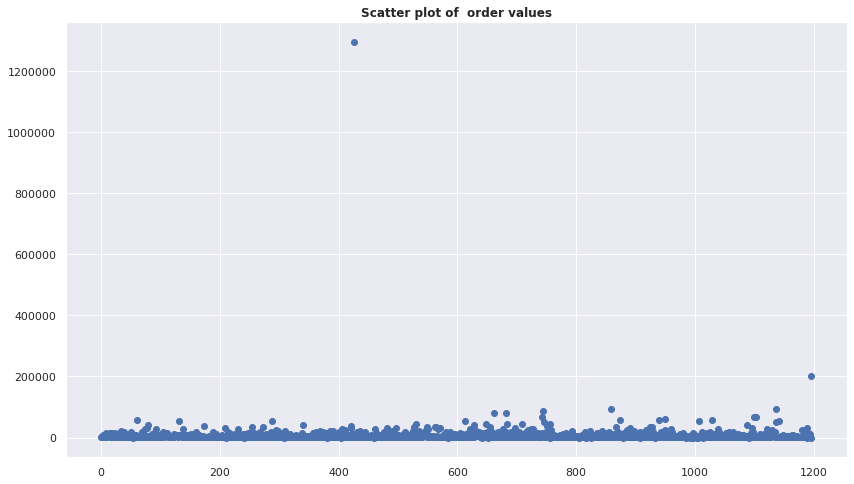

In [155]:

x_values = pd.Series(range(0,len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'])
plt.title('Scatter plot of  order values', fontweight='bold')
plt.show()


На графике сразу видно аномально высокое значение. Ниже поставлю ограничение по оси дохода.

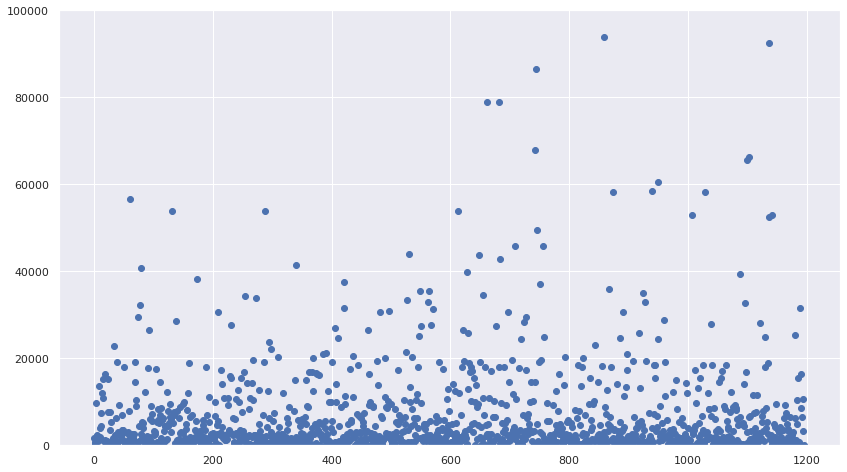

In [143]:
plt.scatter(x_values, orders['revenue'])
plt.ylim(0, 100000)
plt.show()

На данном графике более наглядно видно, что большинство заказов не превосходит по стоимости 40 000. Однако, существуют и те, стоимость которых существенно выше. Далее необходимо будет определить границу для таких выбросов.

#### Расчёт 95-го и 99-го перцентилей стоимости заказов, выбор границы для определения аномальных заказов

np.percentile(orders['revenue'], [95, 99])

Получаю, что не более 5% заказов осуществляются на сумму более 28 000. Лишь 1% заказов по стоимости превосходит порядка 58 000.

Выбираю стоимость в 30 000 за нижнюю границу числа заказов, по которой буду отсеивать аномальные заказы.

In [146]:
orders.query('group == "B" & revenue > 30000').groupby('date')['revenue'].sum().sort_values(ascending=False).head(5)

date
2019-08-19    1327905
2019-08-15     202740
2019-08-08     116770
2019-08-30     114720
2019-08-29     109980
Name: revenue, dtype: int64

Отмечаю, что именно на 19 августа приходится самая аномально высокая стоимость покупок.

---

### Комментарий наставника

Видимо, зашел щедрый и обеспеченный покупатель :)

---

#### Расчёт статистической значимости различий в конверсии между группами по «сырым» данным

Для расчёта применяю непараметрический тест Уилкоксона-Манна-Уитни. Для этого необходимо сформировать отдельные выборки по группам.

In [148]:
# определяю число заказов для каждого пользователя из группы А
orders_by_users_a = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).\
agg({'transaction_id' : pd.Series.nunique})
orders_by_users_a.columns = ['visitor_id', 'orders']

# определяю число заказов для каждого пользователя из группы B
orders_by_users_b = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).\
agg({'transaction_id' : pd.Series.nunique})
orders_by_users_b.columns = ['visitor_id', 'orders']

# формирую выборку для группы A, посетителям, которые не совершили заказ будет соответствовать 0
sample_a = pd.concat([orders_by_users_a['orders'], pd.Series(0, index=np.arange(visitors.query('group == "A"')\
                    ['visitors'].sum() - len(orders_by_users_a['orders'])), name='orders')],axis=0)

# формирую выборку для группы B, посетителям, которые не совершили заказ будет соответствовать 0
sample_b = pd.concat([orders_by_users_b['orders'], pd.Series(0, index=np.arange(visitors.query('group == "B"')\
                    ['visitors'].sum() - len(orders_by_users_b['orders'])), name='orders')],axis=0)

# критический уровень статистической значимости
alpha = .05 

results = st.mannwhitneyu(sample_a, sample_b)

print('p-значение: ', "{0:.3f}".format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

print('Относительный прирост конверсии группы B:', "{0:.3f}".format(sample_b.mean()/sample_a.mean()-1))

p-значение:  0.008
Отвергаем нулевую гипотезу: разница статистически значима
Относительный прирост конверсии группы B: 0.138


Получаю вывод, что прирост конверсии группы B составил почти 14%, и эта разница статистически значима. То есть по данному параметру можно говорить о том, что был достигнут рост конверсии.

---

### Комментарий наставника

Здорово. Однако здесь не помешало бы обоснование выбора твоего статистического критерия

---

#### Расчёт статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

In [149]:
# формирую выборку для группы A
sample_a_new = orders[orders['group']=='A']['revenue']

# формирую выборку для группы B
sample_b_new = orders[orders['group']=='B']['revenue']

# критический уровень статистической значимости
alpha = .05 

results = st.mannwhitneyu(sample_a_new, sample_b_new)

print('p-значение: ', "{0:.3f}".format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

print('Относительный прирост среднего чека группы B:', "{0:.3f}".format(sample_b_new.mean()/sample_a_new.mean()-1))

p-значение:  0.365
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительный прирост среднего чека группы B: 0.259


Получаю вывод, что хотя прирост среднего чека группы B составил почти 26%, эта разница статистически незначима. То есть по данному параметру нельзя говорить о том, что был достигнут значимый рост среднего чека.

#### Расчёт статистической значимости различий в конверсии между группами по «очищенным» данным

Выше было принято, что за аномальных пользователей беру тех, кто совершил более 4-х заказов или совершил заказ дороже 30 000 рублей. Определю аномальных пользователей.

In [150]:
# выделяю тех пользователей, которые совершили более 4-х заказов
users_with_many_orders = pd.concat([orders_by_users_a[orders_by_users_a['orders'] > 4]['visitor_id'], \
                                    orders_by_users_b[orders_by_users_b['orders'] > 4]['visitor_id']], axis = 0)

# выделяю тех пользователей, которые совершили заказ на сумму более 30 000
users_with_expensive_orders = orders[orders['revenue'] > 30000]['visitor_id']

# формирую таблицу аномальных пользователей
abnormal_users = pd.concat([users_with_many_orders, users_with_expensive_orders], axis = 0).drop_duplicates().\
sort_values()

print(abnormal_users.shape[0])

53


Получаю, что всего пользователей с аномальными значениями - 53 (это порядка 4-5% от всех покупателей).

In [151]:
sample_a_filtered = pd.concat([orders_by_users_a[np.logical_not(orders_by_users_a['visitor_id'].\
                            isin(abnormal_users))]['orders'],pd.Series(0, index=np.arange(visitors.\
                            query('group == "A"')['visitors'].sum() - len(orders_by_users_a['orders'])),\
                                                                       name='orders')],axis=0)

# формирую выборку для группы B, исключая аномальных пользователей
sample_b_filtered = pd.concat([orders_by_users_b[np.logical_not(orders_by_users_b['visitor_id'].\
                            isin(abnormal_users))]['orders'],pd.Series(0, index=np.arange(visitors.\
                            query('group == "B"')['visitors'].sum() - len(orders_by_users_b['orders'])),\
                                                                       name='orders')],axis=0)

# критический уровень статистической значимости
alpha = .05 

results = st.mannwhitneyu(sample_a_filtered, sample_b_filtered)

print('p-значение: ', "{0:.3f}".format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

print('Относительный прирост конверсии группы B:', "{0:.3f}".format(sample_b_filtered.mean()/\
                                                                    sample_a_filtered.mean()-1))

p-значение:  0.009
Отвергаем нулевую гипотезу: разница статистически значима
Относительный прирост конверсии группы B: 0.144


По конверсии получаю практически такой же результат, как и для "сырых" данных. Таким образом, и по "сырым", и по "очищенным" данным можно говорить о росте конверсии примерно на 14%.

#### Расчёт статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

In [152]:
# формирую выборку для группы A, исключая аномальных пользователей
sample_a_new_filtered = orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitor_id'].\
                            isin(abnormal_users)))]['revenue']

# формирую выборку для группы B, исключая аномальных пользователей
sample_b_new_filtered = orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitor_id'].\
                            isin(abnormal_users)))]['revenue']

# критический уровень статистической значимости
alpha = .05 

results = st.mannwhitneyu(sample_a_new_filtered, sample_b_new_filtered)

print('p-значение: ', "{0:.3f}".format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

print('Относительный прирост среднего чека группы B:', "{0:.3f}".\
      format(sample_b_new_filtered.mean()/sample_a_new_filtered.mean()-1))

p-значение:  0.490
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительный прирост среднего чека группы B: -0.017


В данном случае также получаю, что как и по "сырым" данным, нельзя сделать вывод о различии. Однако, расчёт относительного изменения среднего чека кардинально изменился. Если по "сырым" данным получался рост почти на 26%, то по очищенным данным получаем сокращение среднего чека почти на 2%. Таким образом, можно говорить о том, что в группу B попали аномальные пользователи с очень высокой стоимостью покупок.

---

### Комментарий наставника

Какое интересное наблюдение вышло. Даже сказал бы, что показательное :)

---

#### Принятие решений по результатам теста

##### Основные выводы, полученные в результате анализа:

Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий. Можно говорить о росте конверсии на 14%.

По сырым и отфильтрованным данным нет статистически значимого различия по среднему чеку между группами. Хотя аномальные пользователи оказали большое влияние на расчёт относительного изменения среднего чека.

График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, зафиксировались к концу периода на уровне 0.10 - 0.15.

График различия среднего чека колеблется, что позволило определить аномалии, определённого вывода по нему сделать нельзя.

На основе полученных выводов, я считаю, что можно остановить тест, зафиксировать победу группы B. Так как по среднему чеку статистически значимого падения по группе B не получили, зато увеличили конверсию, полагаю, это уже достаточно хороший результат.

---

### Комментарий наставника

Думаю, что с тобой можно согласиться, и дать "отмашку" коллегам 

---

#### Часть 3. Общий вывод

Высоко приоритетными гипотезами одновременно в фреймворках ICE и RICE являются:

Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

По результатам проведения A/B теста было выявлено следующее:

В данных присутствуют аномальные значения по числу заказов, совершённых одним пользователем, а также по стоимости заказа. Типичный пользователь совершает не более 4-х заказов на суммы, не превышающие 30 000. Самые крупные заказы с аномальной стоимостью приходятся на 19 августа.

Был достигнут статистически значимый рост конверсии по группе B (порядка 14% относительно группы A). К концу анализируемого периода конверсия по группе B колеблется на уровне 0.10 - 0.15.

Статистически значимое изменение среднего чека получено не было, даже при исключении аномальных заказов из расчёта. Однако, отмечено, что при исключении аномальных пользоватлей, получаем совершенно иной результат по относительному изменению среднего чека.

Так как по одному из параметров (конверсии) был достигнут хороший результат в результате внедрения изменения, а по второму не получили статистически значимого снижения, то результат теста признаю положительным, фиксируя победу группы B.

---

### Комментарий наставника

Поздравляю со сдачей работы! :)

Мне она понравилась. Про техническую стороны я уже отмечал твои работы, тут аналогично :)

Выводы получились ёмкими, и учитывая специфику исследования можно сказать, что ты написал всего достаточно. Было полезно почитать всё. 

Надеюсь, полученные навыки дали тебе понимание этого непростого, но важного вопроса в работе аналитика.

Желаю успеха! Осталось немного :)

---